Visualize the census bureau databset(Adult data sets)by plotting the following graphs using 
Python. (Define objective for every graph)  
a. Histograms    
b. Pie Charts   
c. Box Plots   
d. Scatter Plots   
e. Add boxplots to a scatterplot  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("../files/adult_dataset.csv") 
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

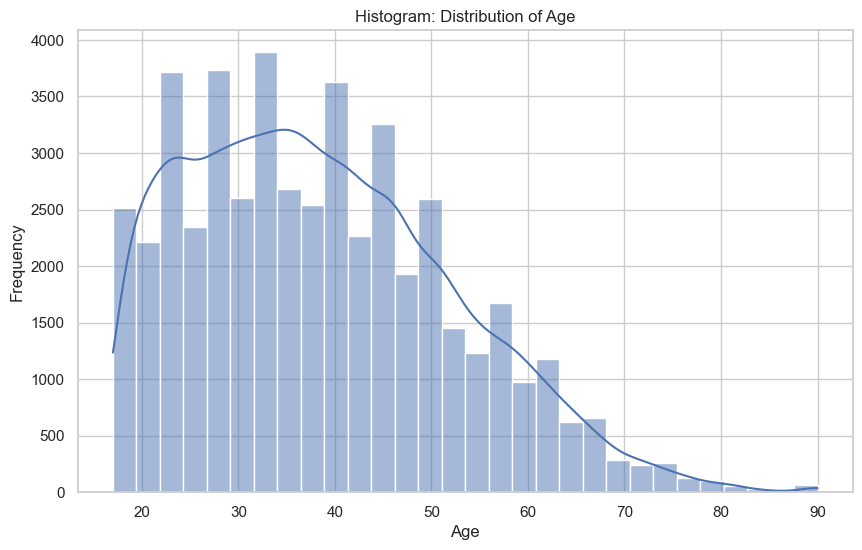

In [4]:
# a. Histograms (Objective: Show distribution of Age)
plt.figure()
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Histogram: Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

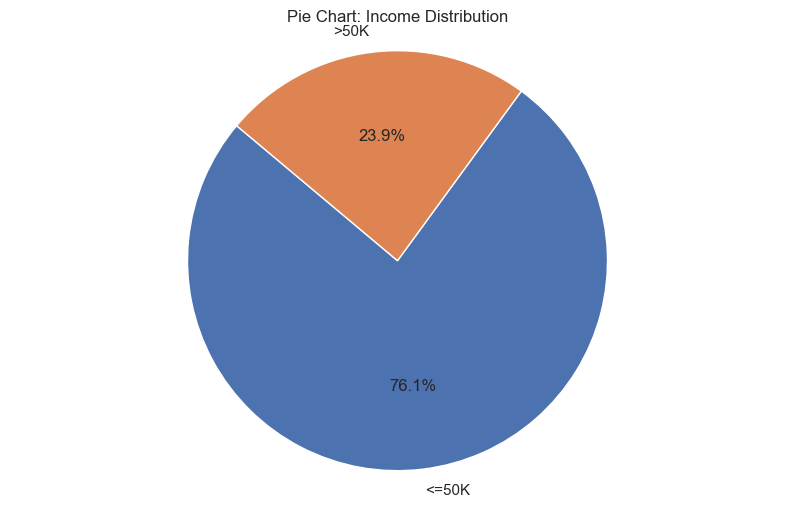

In [5]:
# b. Pie Chart (Objective: Show proportion of income groups)
income_counts = df['income'].value_counts()
plt.figure()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart: Income Distribution")
plt.axis('equal')
plt.show()

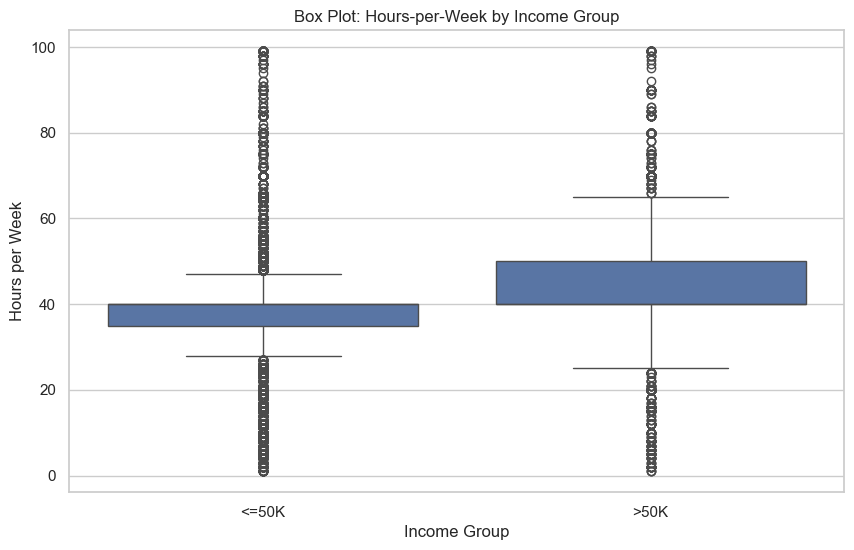

In [7]:
# c. Box Plot (Objective: Detect outliers and spread in working hours)
plt.figure()
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Box Plot: Hours-per-Week by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Hours per Week")
plt.show()

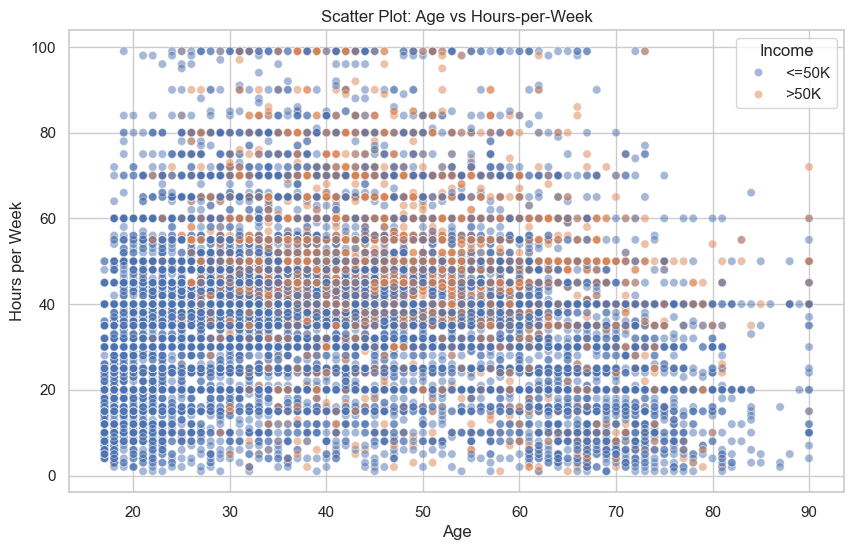

In [8]:
# d. Scatter Plot (Objective: Relationship between Age and Hours-per-Week)
plt.figure()
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df, alpha=0.5)
plt.title("Scatter Plot: Age vs Hours-per-Week")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.legend(title='Income')
plt.show()

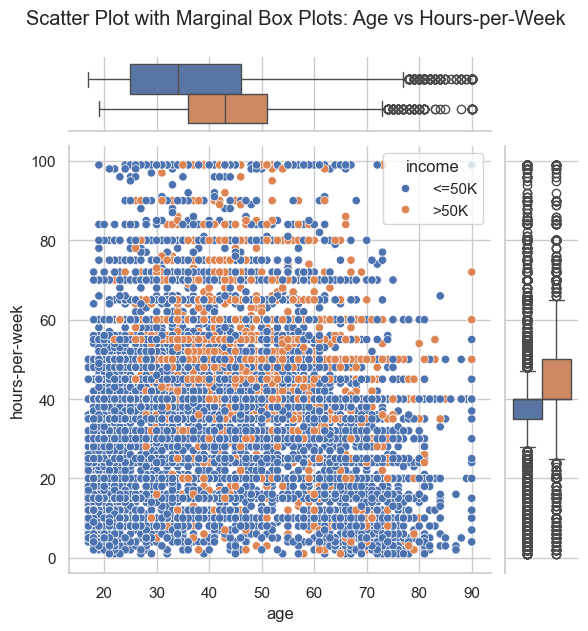

In [10]:
# e. Scatter Plot with Box Plots (Objective: Add boxplot insights to scatter)
# Create the JointGrid object
g = sns.JointGrid(data=df, x='age', y='hours-per-week', hue='income')

# Scatter plot in the center
g.plot_joint(sns.scatterplot)

# Boxplot on the x-axis
sns.boxplot(data=df, x='age', ax=g.ax_marg_x, hue='income', dodge=True)

# Boxplot on the y-axis
sns.boxplot(data=df, y='hours-per-week', ax=g.ax_marg_y, hue='income', dodge=True)

# Remove duplicated legends
g.ax_marg_x.get_legend().remove()
g.ax_marg_y.get_legend().remove()

# Add overall title
g.fig.suptitle("Scatter Plot with Marginal Box Plots: Age vs Hours-per-Week", y=1.05)

plt.show()